In [658]:
# Import Libraries
import joblib
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

plt.style.use({'figure.facecolor':'white'})

In [659]:
# Read CSV
df = pd.read_csv('C:/Users/mwaqa/Desktop/FYP-Soil-Analysis/Data/Manual Readings of pH, EC and Temperature.csv').drop(['ppm'], 1)
df.head()

,Temperature,pH,Adjusted pH,EC
0,24.81,7.0,6.908699,0.82
1,25.31,7.0,6.978184,0.29
2,25.56,7.0,6.973090,0.48
3,25.75,7.0,6.935358,0.48
4,25.75,7.0,7.010641,0.47


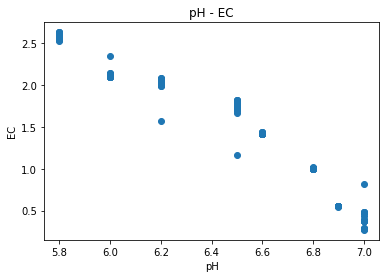

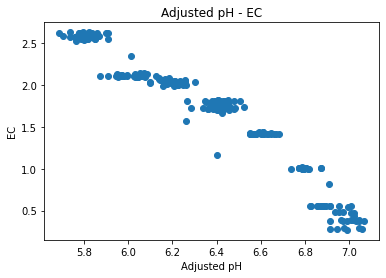

In [660]:
EC, pH, adjusted_pH = df[['EC']], df[['pH']], df[['Adjusted pH']]

# Plot between pH and EC
plt.scatter(pH, EC)
plt.title('pH - EC')
plt.xlabel('pH')
plt.ylabel('EC')
plt.show()

# Plot between Adjusted pH and EC
plt.scatter(adjusted_pH, EC)
plt.title('Adjusted pH - EC')
plt.xlabel('Adjusted pH')
plt.ylabel('EC')
plt.show()

In [661]:
# Extract Input Columns ( Adjusted pH, Temperature )
X_adjusted = df[['Adjusted pH', 'Temperature']]
X_adjusted.head()

,Adjusted pH,Temperature
0,6.908699,24.81
1,6.978184,25.31
2,6.973090,25.56
3,6.935358,25.75
4,7.010641,25.75


In [662]:
# Extract Output Columns ( EC )
y_adjusted = df[['EC']]
y_adjusted.head()

,EC
0,0.82
1,0.29
2,0.48
3,0.48
4,0.47


In [663]:
# Extract Input Columns ( Original pH, Temperature )
X_original = df[['pH', 'Temperature']]
X_original.head()

,pH,Temperature
0,7.0,24.81
1,7.0,25.31
2,7.0,25.56
3,7.0,25.75
4,7.0,25.75


In [664]:
# Extract Output Columns ( EC )
y_original = df[['EC']]
y_original.head()

,EC
0,0.82
1,0.29
2,0.48
3,0.48
4,0.47


In [665]:
# Split Train & Test Data For Both Adjusted & Original Values
X_adjusted_train, X_adjusted_test, y_adjusted_train, y_adjusted_test = train_test_split(X_adjusted, y_adjusted, random_state=1)
X_original_train, X_original_test, y_original_train, y_original_test = train_test_split(X_original, y_original, random_state=1)

y_adjusted_train = y_adjusted_train.values.ravel()
y_adjusted_test = y_adjusted_test.values.ravel()

y_original_train = y_original_train.values.ravel()
y_original_test = y_original_test.values.ravel()

In [666]:
# Fit Two Models With Both Original & Adjusted Data
adjusted_data_model = MLPRegressor(random_state=1, max_iter=1000, activation='relu', hidden_layer_sizes=(100, 75, 75)).fit(X_adjusted_train, y_adjusted_train)
original_data_model = MLPRegressor(random_state=1, max_iter=1000, activation='relu', hidden_layer_sizes=(100, 75, 75)).fit(X_original_train, y_original_train)

In [667]:
# Generate Losses For Both Adjusted & Original Models
adjusted_data_model_loss = adjusted_data_model.loss_curve_
original_data_model_loss = original_data_model.loss_curve_

adjusted_data_model_iteration = list(range(1, len(adjusted_data_model_loss) + 1))
original_data_model_iteration = list(range(1, len(original_data_model_loss) + 1))

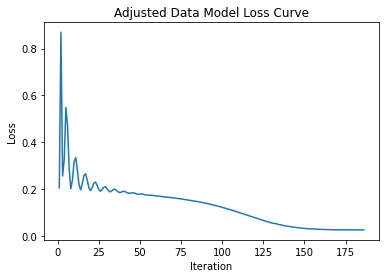

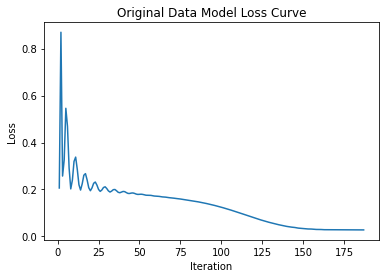

In [668]:
# Adjusted Data Model Loss Curve
plt.plot(adjusted_data_model_iteration, adjusted_data_model_loss)
plt.title('Adjusted Data Model Loss Curve')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

# Original Data Model Loss Curve
plt.plot(original_data_model_iteration, original_data_model_loss)
plt.title('Original Data Model Loss Curve')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [669]:
# Checking The R2 Score Of Both Models
adjusted_data_model_score = adjusted_data_model.score(X_adjusted_test, y_adjusted_test)
original_data_model_score = original_data_model.score(X_original_test, y_original_test)

print('Adjusted Data Model Score: ', adjusted_data_model_score)
print('Original Data Model Score: ', original_data_model_score)

Adjusted Data Model Score:  0.9051440666032485
Original Data Model Score:  0.8869050455326086


In [670]:
# Saving The Models
joblib.dump(adjusted_data_model, 'C:/Users/mwaqa/Desktop/FYP-Soil-Analysis/Models/EC - pH Adjusted Data Model.h5')
joblib.dump(original_data_model, 'C:/Users/mwaqa/Desktop/FYP-Soil-Analysis/Models/EC - pH Original Data Model.h5')


['C:/Users/mwaqa/Desktop/FYP-Soil-Analysis/Models/EC - pH Original Data Model.h5']